# ENGG 3130 - Modelling Complex Systems
## Jason Quon (0969675) - jquon@uoguelph.ca
## Thermal modelling using scientific python
In this notebook, we will create a model of how a hot cup of tea cools down once the liquid has been poured into a cup.

This lab uses data from the University of Southampton's Scientific Python Training Program. A research team has measured the temperature of a cooling cup of tea using some specialized equipment. The equipment takes one temperature reading every 10 seconds. The measurements are noisy, and something also went wrong with the equipment such that no data was collected for the first minute.

The questions we aim to answer are:

1) What was the initial temperature (at t = 0)?

2) How quickly does the tea cool down? In particular, at what time is it safe to drink (assuming a safe temperature is 60 deg C)?

3) What will be the final temperature of the tea if we wait indefinitely (presumably this will be the temperature of the room where the experiment was conducted)?

### Import required libraries

In [1]:
import numpy as np
import scipy.io as sio
import scipy.optimize as sop
import math
import matplotlib.pyplot as plt

First we implement the temperature function used to model this data. This model makes some simplifying assumptions and defines variables:

We assume that the initial temperature, Ti, is the temperature at which the tea has been poured into the cup.

If we wait indefinitely, the final temperature will reach the value of the ambient temperature, Ta, which will be the environmental temperature in the lab where the measurements were taken.

We further assume that the cup has no significant heat capacity to keep the problem simple.

We assume that the cooling process follows a particular model. In particular, we assume that the rate with which the temperature T changes as a function of time is proportional to the difference between the current temperature T(t) and the temperature of the environment T(a):

dT/dt = (1/C)(Ta−T)
We can solve this differential equation analytically and obtain a model equation:

T(t) = (Ti−Ta)exp(−t/C) + Ta
where C is the time constant for the cooling process (which is expressed in seconds). The larger C, the longer it takes for a hot drink to cool down. Over a period of C seconds, the drink’s temperature will decrease by roughly 2/3.

In [2]:
def model(t, Ti, Ta, C):
    """
    t: time in seconds
    Ti: initial temperature
    Ta: ambient temperature
    C: time constant
    
    return: temerature of the tea
    """
    return (Ti - Ta)*np.exp(-t/C)+ Ta

Next we write a function that extracts key information from the given data set.

In [3]:
def extract_parameters(ts, Ts):
    """
    ts: numpy array with time values
    Ts: numpy array of the smae length as ts with corresponding tmperature values
    
    return: tuple of three model parameters Ti (initital temperature), Ta (ambient temperature), c (time constant)
    """
    result, other = sop.curve_fit(model, ts, Ts, [82.0, 20.0, 8.0]) # Fit data to a curve using an initial estimate
    return result

Now we determine when the tea reaches a drinkable temperature of 60 degrees. An analytical method was used to find the 6o degree time as opposed to an analytical method. This method is fine for the purposes of this system but would not be suitable for more complex systems. A numerical method for solving for time could could be implemented using knowledge from MATH*2130 - Numerical Methods or simply by making use of Scipy functionality for root finding.

*Note: Function assumes Ti > 60, Ti > Ta*

In [4]:
def sixty_degree_time(Ti, Ta, C):
    """
    Ti: initial temperature
    Ta: ambient temperature
    C: time constant
    
    return: time in seconds it takes for the tea to reach 60 degrees
    """
    return -C * math.log((60 - Ta)/(Ti - Ta))

# Results
We start by loading data from file a matlab file and parsing into arrays

In [5]:
file_content = sio.loadmat('time_temp.mat')
ts, Ts = file_content['data'].T

## Plotting data

### Actual data

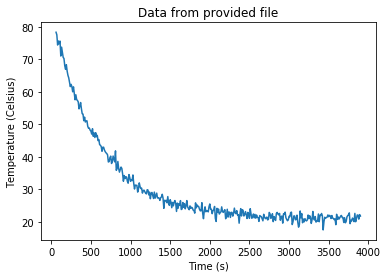

In [6]:
plt.plot(ts, Ts)
plt.title('Data from provided file')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Celsius)')
plt.show()

### Fitted curve

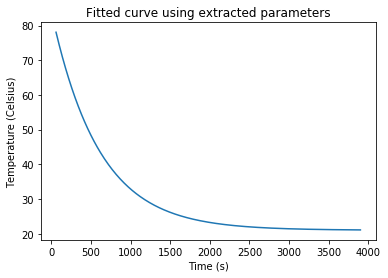

In [7]:
parameters = extract_parameters(ts, Ts)
plt.plot(ts, model(ts, parameters[0], parameters[1], parameters[2]))
plt.title('Fitted curve using extracted parameters')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Celsius)')
plt.show()

Plotting the fitted curve over the actual data we see that our model creates a reasonably accurate estimate.

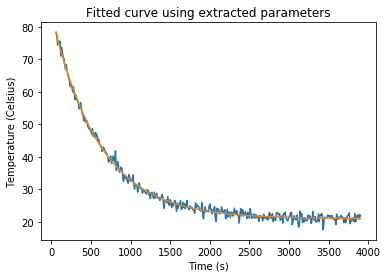

In [8]:
plt.plot(ts, Ts)
plt.title('Data from provided file')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Celsius)')
plt.plot(ts, model(ts, parameters[0], parameters[1], parameters[2]))
plt.title('Fitted curve using extracted parameters')
plt.xlabel('Time (s)')
plt.ylabel('Temperature (Celsius)')
plt.show()

### Data from extract_parameters()

In [9]:
print('Initial temperature (Ti):', round(parameters[0], 2), 'degrees') 
print('Ambient temperature (Ta):', round(parameters[1], 2), 'degrees') 
print('Time constant(C):', round(parameters[2], 2), 'seconds')

Initial temperature (Ti): 84.08 degrees
Ambient temperature (Ta): 21.01 degrees
Time constant(C): 599.24 seconds


### Data from sixty_degree_time()


In [10]:
sdt = round(sixty_degree_time(parameters[0], parameters[1], parameters[2]), 2)
print('Sixty degree time:', (int)(sdt/60), 'minutes', sdt%60, 'seconds')

Sixty degree time: 4 minutes 48.25 seconds


# Conclusion
As we can see, the initial temperature was determined to be 84.08 degrees with an ambient temperature and therefore final temperature of 21.01 degrees. The tea becomes safe to drink after 4 minutes and 48 seconds.